In [200]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## The problem

- We have to choose between 3 doors to open.
- One of them has a car, the other 2 a goat
- We first choose one of the 3, but they don't open it.
- They open one of the 2 remaining doors to show there is a goat.
- We now have to choose one of the 2

## Which of the two doors should we choose?
- Stay with our first selection
- Change to the other door

## The Math
What are the odds? Should I stay with the first selection? Should I change? Is it option better than the other one?

W = "Winning the car"

### I will stay with my first choice

$P(W) = 1/3$

I will win if I hit the correct door in my first attempt. So I have 1 over 3 possible doors

### I will throw a coin and choose randomly between the 2 remaining doors

$P(W) = 1/2$

Thats good! I have increased my odds to 1 over the 2 possible doors


### I will change my choice

Lets say I have chosen door 1 and they opened door 2 to show there is a goat. 

$C_1$ = "Car behind door 1"

$C_3$ = "Car behind door 3"

$G_2$ = "Goat behind door 2"

The probability of a car in door 1 is 1/3

$P(C_1) = 1/3$ 

I want to know which is the probability that there is a car behing door 1 given that there is a goat behing door 2. Or which is the probability that there is a car behing door 3 given that there is a goat behing door 2

$P(C_1|G_2)$ = ? 

$P(C_3|G_2)$ = ? 

$P(C_1|G_2) + P(C_3|G_2) = 1$

By bayes rule:

$P(C_1|G_2) = \frac{P(G_2/C_1)P(C_1)}{P(G_2)}$

$P(C_1|G_2) = \frac{P(G_2/C_1)P(C_1)}{P(G_2|C_1)P(C_1) + P(G_2|not C_1)P(not C_1)}$

$P(C_1|G_2) = \frac{(1/2)(1/3)}{(1)(1/3)+(1/2)(1/3)} = 1/3$

$P(notC_1|G_2) = P(C_3|G_2) = 2/3$ 

So you better choose door 3!!! ;)

## You don't trust the math? Lets simulate it!

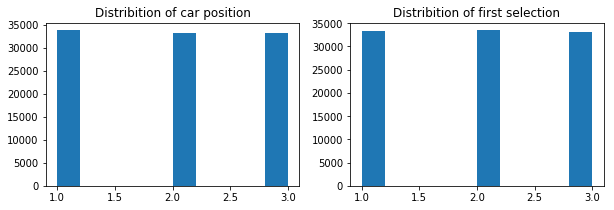

In [199]:
# Big enough for accuracy
N = 100000

# The car position is set randomly in any of the 3 doors
car_position = np.random.randint(3, size = N) + 1

# The first selection is choosen randomly for any of the 3 doors
first_selection = np.random.randint(3, size = N) + 1

# Plot hists
f, ax = plt.subplots(ncols=2, nrows=1, figsize = (10,3))
ax[0].hist(car_position)
ax[0].set_title("Distribition of car position")
ax[1].hist(first_selection)
ax[1].set_title("Distribition of first selection")
plt.show()

In [182]:
win_count_random = 0
win_count_stay = 0
win_count_change = 0
for i in range(len(car_position)):
    doors = [1,2,3]
    
    ## Remove selection and car
    doors.remove(first_selection[i])
    if car_position[i] in doors:
        doors.remove(car_position[i])
    
    ## If selection and car are the same chose randomly the door to open
    door_opened = doors[np.random.randint(len(doors))]
    
    ## The new options are my first plus the remaining
    new_options = [1,2,3]
    new_options.remove(door_opened)
    
    ## Select randomly between the 2 options
    second_selection_random = new_options[np.random.randint(2)]
    
    ## Change selection
    new_options.remove(first_selection[i])
    change_door = new_options[0]
    
    if  car_position[i] == second_selection_random:
        win_count_random = win_count_random + 1
        
    if  car_position[i] == first_selection[i]:
        win_count_stay = win_count_stay + 1
        
    if  car_position[i] == change_door:
        win_count_change = win_count_change + 1
        
print("Select second time ramdomly: %d"%(100*win_count_random/N))
print("Select the same door: %d"%(100*win_count_stay/N))
print("Change door: %d"%(100*win_count_change/N))

Select second time ramdomly: 49
Select the same door: 33
Change door: 66
